<a href="https://colab.research.google.com/github/spantoskey/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Scott_Pantoskey_LS_DS_133_Multiple_Regression_Assignment_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3 Module 3


### Learning Objectives

* model the relationship of multiple predictor variables to a single outcome
* conduct a t-test to determine the significance of individual variables in the model
* compare model fit using R-squared

## Part A: Introduction

### Statistical significance between head size and brain weight in healthy adult humans

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

### Use the above information to complete the following tasks.

**Task 1** - Load the data

Let's load the data! The URL has been provided as well as the imports for pandas and numpy.

* load your CSV file into a DataFrame named `df`

In [20]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url, skipinitialspace=True, header=0)

# Print out your DataFrame
df.head()
# len(df)

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [21]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2** - Fit OLS MOdel

Run the OLS model relating head size to brain weight - you should have done this in your project yesterday. The `statsmodels.formula.api` import has been provided. After you fit your model, print out your model results.

* fit a model and name your variable `model`

*Hint: Make sure to use the format Y ~ X*

In [22]:
# Task 2

# Import statsmodels - DON'T Delete
from statsmodels.formula.api import ols

# YOUR CODE HERE

model = ols('Brain ~ Head', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           5.96e-54
Time:                        02:26:20   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

In [ ]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Adjusted $R^2$

Using your model summary, what is the adjusted $R^2$ for this model?  

* assign the value of adjusted $R^2$ to the variable `adj_R2` (use three decimal places, e.g. 0.123)

Short answer: Explain what this value means in a complete sentence.

ANSWER: 64% of the variability in brain weight is explained by differences in head size in healthy human adults.


In [23]:
# Task 3

# YOUR CODE HERE
adj_R2 = 0.639

# Print the adjusted R^2 value
print('The adjusted R^2 is: ', adj_R2)

The adjusted R^2 is:  0.639


In [24]:
# Task 3 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 4** - Encoding new variables

From the data dictionary for this data set:

Gender
* 1 = male
* 2 = female

Age
* 1 = younger than age 46
* 2 = age 46 and older

Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the DataFrame to do this - don't overwrite the original variables!

* create a new variable for age and give it the column name `age_01`
* create a new variable for gender and give it the column `gender_01`

In [25]:
# Task 4

# YOUR CODE HERE
df['Age_01'] = df['Age'] - 1
df['Gender_01'] = df['Gender'] - 1

# View the DataFrame
df.head()

,Gender,Age,Head,Brain,Age_01,Gender_01
0,1,1,4512,1530,0,0
1,1,1,3738,1297,0,0
2,1,1,4261,1335,0,0
3,1,1,3777,1282,0,0
4,1,1,4177,1590,0,0


In [16]:
# Task 4 - Test

assert df.shape == (237, 6), 'Did you add two new columns (and only two)?'


**Task 5** - Multiple Regression (adding in Age)

We're going to try to improve our model by fitting a model on more than one independent parameter.

* fit a model to Y (brain weight) and X1 and X2 (head size and age group); assign your model to the variable `model_2` (make sure to use `Age_01` for the age variable)

*Hint: Enter the model in the format Y ~ X1 + X2*

In [28]:
# Task 5

# YOUR CODE HERE
model_2 = ols('Brain ~ Head + Age_01', data=df).fit()


# Print the model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.38e-53
Time:                        02:26:52   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

In [ ]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Statistical significance

* Find the p-value for `Age_01` in your model and assign it to the variable `pval_age` (use three decimal places, e.g. 0.123)

At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

ANSWER:The age group is not statistically significantly associated with brain weight after accounting for head size because the p-value for age group, 0.029, is less than the significance value, 0.05.

At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size? Explain your answer in at least one complete sentence.

ANSWER: The age group is statistically significantly associated with brain weight after accounting for head size because the p-value for age group, 0.029, is greater than the significance value, 0.01.


In [32]:
# Task 6

# YOUR CODE HERE
pval_age = 0.029

In [33]:
# Task 6 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Adjusted $R^2$

What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  

* assign the adjusted $R^2$ value to `adj_R2_new`

Does adding age group to the model increase the amount of variability in brain weight explained by the model?

In [34]:
# Task 7

# YOUR CODE HERE
adj_R2_new = 0.647

# Print the adjusted R^2 new value
print('The adjusted R^2 new is: ', adj_R2_new)

The adjusted R^2 new is:  0.647


In [35]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Multiple Regression (adding in Gender)

We're going to try another multiple regression to improve our model.

* fit a model to Y (brain weight) and X1 and X2 (head size and gender); assign your model to the variable `model_3` (make sure to use `Gender_01` for the age variable)

*Hint: Enter the model in the format Y ~ X1 + X2*

In [37]:
# Task 8

# YOUR CODE HERE
model_3 = ols('Brain ~ Head + Gender_01', data=df).fit()

# Print the model summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           4.15e-53
Time:                        02:30:52   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.7139     57.299      6.609      0.0

In [ ]:
# Task 8 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Significance (short answer)

At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

ANSWER: Since gender's p-value (0.107) is greater than 0.05, gender is statistically significantly associated with brain weight after accounting for head size at the 0.05 level.

**Task 10** - Linear model equation

Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight. *Make sure to use the correct model!*

EQUATION: $\hat{y}$ = 347.5505 + 0.2604 x Head - 20.7316 x Age

**Task 11** - Create a plot

Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals. You can use matplotlib or seaborn.

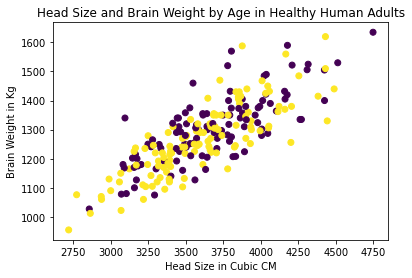

In [53]:
# Task 11
# YOUR CODE HERE

import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

plt.scatter(x = df['Head'], y = df['Brain'], c = df['Age_01'])

ax.set_title('Head Size and Brain Weight by Age in Healthy Human Adults')
ax.set_xlabel('Head Size in Cubic CM')
ax.set_ylabel('Brain Weight in Kg')

plt.show()

**Task 12** - Make predictions

Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm. **Make sure to select the correct model you fit above!**

* assign the head size to the variable `x1`
* assign the age group (either a 0 or 1) to the variable `x2`
* assign the intercept to `intercept`
* assign the slope parameter for the head size to `slope1`
* assign the slope parameter for age to `slope2`
* assign the prediction to the variable `predicted`

In [40]:
# Task 12

# YOUR CODE HERE
x1 = 4000
x2 = 1
intercept = 347.5505
slope1 = 0.2604
slope2 = -20.7316
predicted = intercept + x1*slope1 + x2*slope2

# View your prediction
print('The predicted value for brain size is:', predicted)

The predicted value for brain size is: 1368.4189000000001


In [41]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Make another prediction

Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm. Use the same slope and intercept parameters you used above. But - change your `x1` and `x2` values!

* assign your prediction to the variable `predicted_2`

In [42]:
# Task 13

# YOUR CODE HERE
x1 = 3900
x2 = 0
intercept = 347.5505
slope1 = 0.2604
slope2 = -20.7316
predicted_2 = intercept + x1*slope1 + x2*slope2

# View your prediction
print('The predicted value for brain size is:', predicted_2)


The predicted value for brain size is: 1363.1105


In [43]:
# Task 13 - Test
# Hidden tests - you will see the results when you submit to Canvas

## Part B

### Sleep Data

Use the following information to answer the rest of the tasks in this project.

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 

Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

* load in the CSV file as a DataFrame and assign it to the variable `df_sleep`
* make sure to view the DataFrame!

In [44]:
# Task 14

data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2, skipinitialspace=True, header=0)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


At the end of the guided project, we'd decided that the best model of dreaming sleep has the two variables gestation time and danger index.  

**Task 15**

Plot the relationship of body size to dreaming sleep

* turn off the CI on the plot

Describe the shape of the relationship.


ANSWER:There is no clear linear relationship between body size and dreaming sleep. There are a few outliers in the distribution.

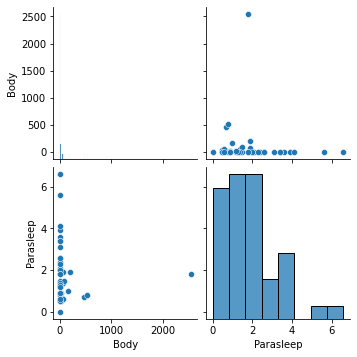

In [45]:
# Task 15

# YOUR CODE HERE
import seaborn as sns

to_plot = df_sleep[['Body','Parasleep']]

sns.pairplot(to_plot)


**Task 16** - Transformation: take the log

Does it appear that a log transformation of the `Body` variable would improve the model fit? Let take the log and then look at the plot again.

* Create a new variable with the log of `Body` and add it as a column to `df_sleep` with the name `log_body` 
* Create a new variable with the log of gestational time and add it as a column to `df_sleep` with the name `log_gest` 

*Hint: use the natural log `np.log()`*

In [47]:
# Task 16

# YOUR CODE HERE
df_sleep['log_body'] = np.log(df_sleep['Body'])
df_sleep['log_gest'] = np.log(df_sleep['Gest'])

# Print out the updated DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,log_body,log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.000000,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,7.842671,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,2.356126,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,-3.772261,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.075174,5.971262


In [49]:
# Task 16 - Test
assert df_sleep.shape == (42, 13), 'Make sure you added two columns.'

# Hidden tests - you will see the results when you submit to Canvas

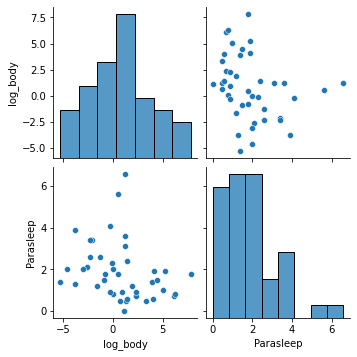

In [50]:
# Task 16 - Plot
# NOT autograded

# YOUR CODE HERE
import seaborn as sns

to_plot = df_sleep[['log_body','Parasleep']]

sns.pairplot(to_plot)


**Task 17** - Multiple Regression Model

Run an OLS model using gestation time, danger index and the log of body size.  Is the log of body size statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors?

(This task will not be autograded)

ANSWER: No, log of body size is not statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors since it's p-value is greater than 0.05

In [56]:
# Task 17
# NOT autograded

# Enter the model in the format Y ~ X1 + X2 + X3

# YOUR CODE HERE
model_sleep = ols('Parasleep ~ log_body + Gest + C(Danger)', data=df_sleep).fit()

#Print the model summary
print(model_sleep.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     4.670
Date:                Thu, 12 Nov 2020   Prob (F-statistic):            0.00138
Time:                        03:10:02   Log-Likelihood:                -60.534
No. Observations:                  42   AIC:                             135.1
Df Residuals:                      35   BIC:                             147.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5683      0.392      9.

**Task 18** - Plot

Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

(This task will not be autograded)

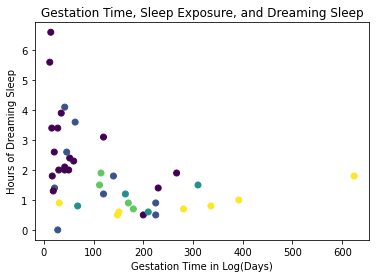

In [59]:
# Task 18
# NOT autograded

# YOUR CODE HERE
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

#Color the points differently depending the mammal's danger index
plt.scatter(x = df_sleep['Gest'], y = df_sleep['Parasleep'], c = df_sleep['Exposure'])

ax.set_title('Gestation Time, Sleep Exposure, and Dreaming Sleep')
ax.set_xlabel('Gestation Time in Log(Days)')
ax.set_ylabel('Hours of Dreaming Sleep')

plt.show()

**Task 19** - Multiple Regression Model

Run an OLS model using the log of gestation time and sleep exposure index to predict the amount of time spent in dreaming sleep.  Is sleep exposure index a better predictor of amount of time spent in dreaming sleep than danger index?

(This task will not be autograded)

ANSWER: No, the danger index results in a higher R-squared value so it is a better predictor of time spent in dreaming sleep than sleep exposure.

In [57]:
# Task 19
# NOT autograded

# YOUR CODE HERE
model_sleep_2 = ols('Parasleep ~ log_gest + Exposure', data=df_sleep).fit()

# Print the model summary
print(model_sleep_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     11.52
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           0.000117
Time:                        03:13:42   Log-Likelihood:                -63.137
No. Observations:                  42   AIC:                             132.3
Df Residuals:                      39   BIC:                             137.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8688      0.770      6.321      0.0

**Task 20** - Plot

Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

(This task will not be autograded)

ANSWER: 

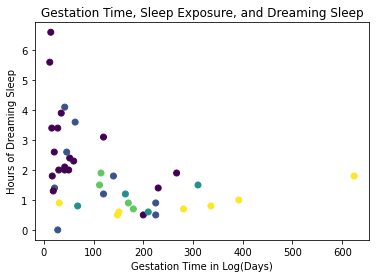

In [60]:
# Task 20
# NOT autograded

# YOUR CODE HERE
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

#Color the points differently depending the mammal's danger index
plt.scatter(x = df_sleep['Gest'], y = df_sleep['Parasleep'], c = df_sleep['Exposure'])

ax.set_title('Gestation Time, Sleep Exposure, and Dreaming Sleep')
ax.set_xlabel('Gestation Time in Log(Days)')
ax.set_ylabel('Hours of Dreaming Sleep')

plt.show()

**Task 21** - Multiple Regression Model

Run an OLS model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of amount of time spent in dreaming sleep than danger index?

(This task will not be autograded)

ANSWER: No, because including Danger in the multi-regression model results in a larger r-squared value than including predation index.

In [64]:
# Task 21
# NOT autograded

# YOUR CODE HERE
model_sleep_3 = ols('Parasleep ~ log_gest + Pred', data=df_sleep).fit()
# model_sleep_3 = ols('Parasleep ~ log_gest + C(Danger)', data=df_sleep).fit()

# Print the model summary
print(model_sleep_3.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.85
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           9.15e-06
Time:                        03:17:19   Log-Likelihood:                -60.389
No. Observations:                  42   AIC:                             126.8
Df Residuals:                      39   BIC:                             132.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9844      0.753      7.951      0.0

## Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for improvement.